In [9]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

In [10]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

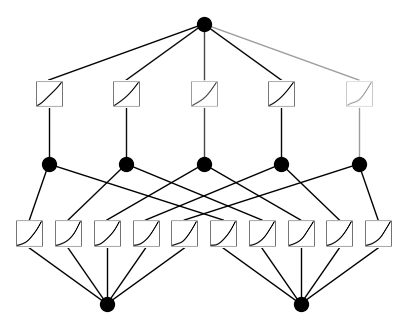

In [11]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [12]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.34e-01 | test loss: 1.38e-01 | reg: 2.80e+01 : 100%|██| 20/20 [00:09<00:00,  2.11it/s]


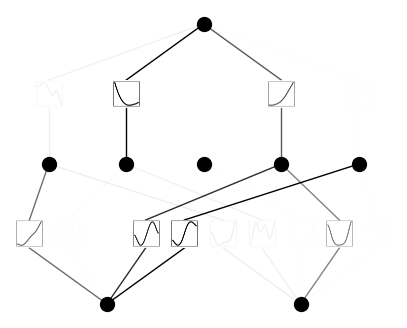

In [13]:
model.plot()

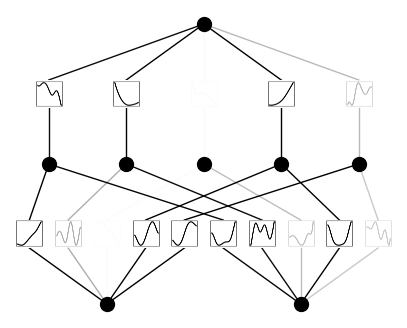

In [14]:
model.plot(beta=100)

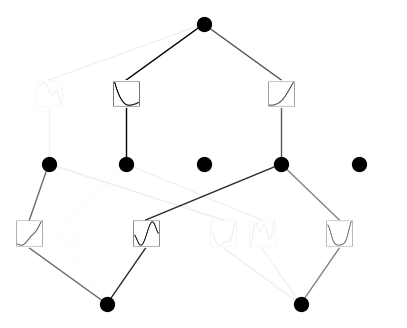

In [20]:
model.prune()
model.plot(mask=True)

In [21]:
model = model.prune()
model.plot()

AttributeError: 'KAN' object has no attribute 'acts'

In [22]:
model = model.prune()
model

AttributeError: 'KAN' object has no attribute 'acts_scale'

In [23]:
model

KAN(
  (biases): ModuleList(
    (0): Linear(in_features=5, out_features=1, bias=False)
    (1): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

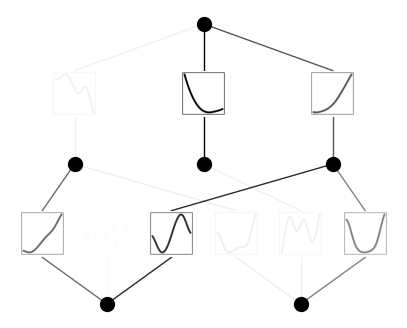

In [27]:
model(dataset['train_input'])
model.plot()

In [28]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 3.92e-03 | test loss: 4.13e-03 | reg: 9.48e+00 : 100%|██| 50/50 [00:17<00:00,  2.81it/s]


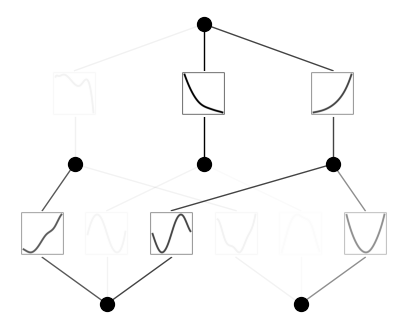

In [29]:
model.plot()

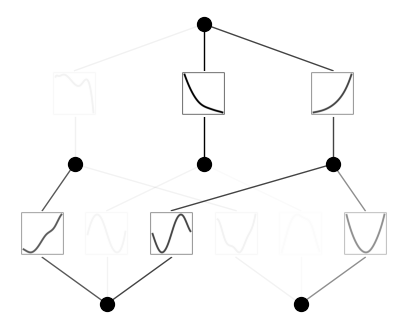

In [30]:
model.prune()
model.plot(mask=True)

In [31]:
model.symbolic_formula()[0][0]

make sure all activations need to be converted to symbolic formulas first!


TypeError: 'NoneType' object is not subscriptable

In [32]:
model.symbolic_formula()

make sure all activations need to be converted to symbolic formulas first!


In [34]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with abs, r2=0.9897658824920654
fixing (0,0,1) with sin, r2=0.9979293942451477
fixing (0,0,2) with sin, r2=0.9993698596954346
fixing (0,1,0) with x^2, r2=0.9781949520111084
fixing (0,1,1) with x^2, r2=0.9843782186508179
fixing (0,1,2) with x^2, r2=0.9997010231018066
fixing (1,0,0) with tanh, r2=0.6919141411781311
fixing (1,1,0) with x^4, r2=0.9976835250854492
fixing (1,2,0) with exp, r2=0.9999696016311646


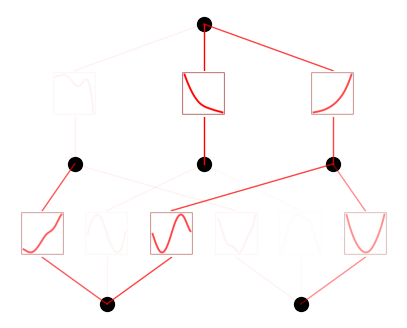

In [35]:
model.plot()

In [36]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 3.21e-04 | test loss: 3.09e-04 | reg: 1.98e+01 : 100%|██| 50/50 [00:08<00:00,  5.69it/s]


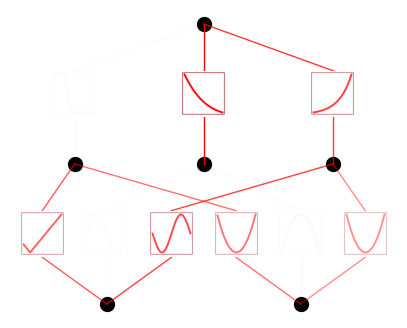

In [37]:
model.plot()

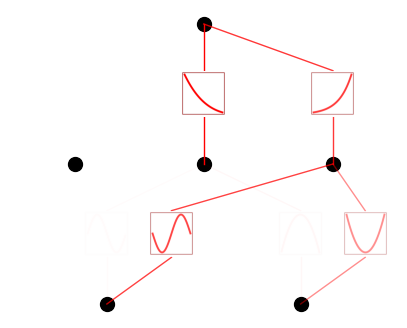

In [38]:
model.prune()
model.plot(mask=True)

In [40]:
model = model.prune()

AttributeError: 'KAN' object has no attribute 'acts_scale'

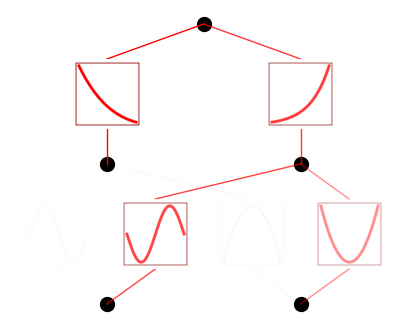

In [41]:
model(dataset["train_input"])
model.plot()

train loss: 3.89e-04 | test loss: 3.91e-04 | reg: 3.21e+01 : 100%|██| 50/50 [00:05<00:00,  9.17it/s]


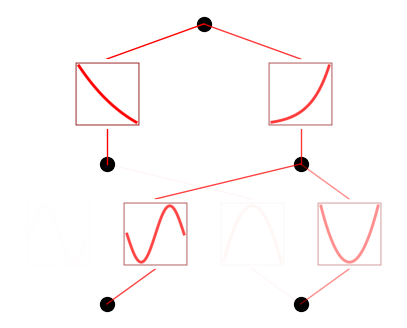

In [42]:
# train, prune, plot, repeat
model.train(dataset, opt="LBFGS", steps=50)
model = model.prune()
model(dataset["train_input"])
model.plot()

train loss: 3.81e-04 | test loss: 3.79e-04 | reg: 3.21e+01 : 100%|██| 50/50 [00:03<00:00, 12.86it/s]


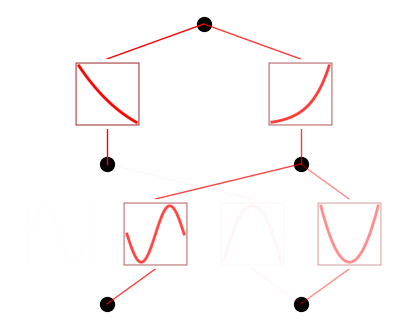

In [43]:
# train, prune, plot, repeat
model.train(dataset, opt="LBFGS", steps=50)
model = model.prune()
model(dataset["train_input"])
model.plot()

train loss: 3.81e-04 | test loss: 3.79e-04 | reg: 3.21e+01 : 100%|██| 50/50 [00:04<00:00, 11.92it/s]


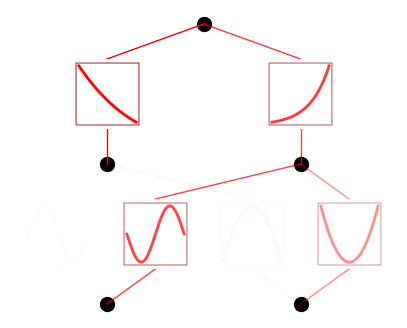

In [44]:
# train, prune, plot, repeat
model.train(dataset, opt="LBFGS", steps=50)
model.plot()

In [45]:
model.symbolic_formula()[0][0]

0.02*(0.12*(x_2 + 0.01)**2 - 0.11*sin(3.09*x_1 - 3.2) + 1)**4 + 0.98*exp(1.0*x_2**2 + 1.01*sin(3.14*x_1)) - 0.e-2

description:   0%|                                                          | 0/100 [13:35<?, ?it/s]


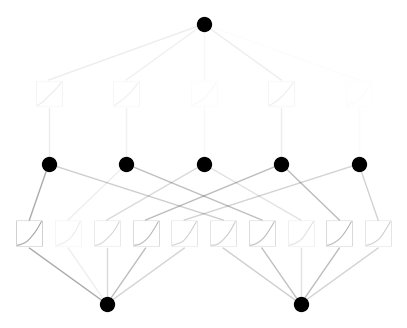

In [57]:
model2 = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model2(dataset['train_input'])
model2.plot()

train loss: 1.34e-01 | test loss: 1.38e-01 | reg: 2.80e+01 : 100%|██| 20/20 [00:12<00:00,  1.59it/s]


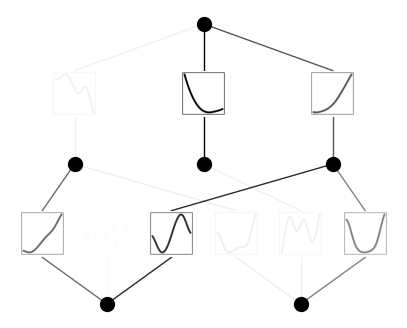

In [58]:
model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model2 = model2.prune()
model2(dataset['train_input'])
model2.plot()

train loss: 1.99e-01 | test loss: 2.03e-01 | reg: 2.06e+01 : 100%|██| 20/20 [00:11<00:00,  1.80it/s]


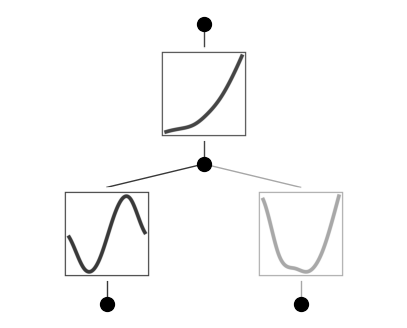

In [59]:
model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model2 = model2.prune()
model2(dataset['train_input'])
model2.plot()

train loss: 4.95e-02 | test loss: 5.05e-02 | reg: 3.89e+00 : 100%|██| 20/20 [00:06<00:00,  3.20it/s]


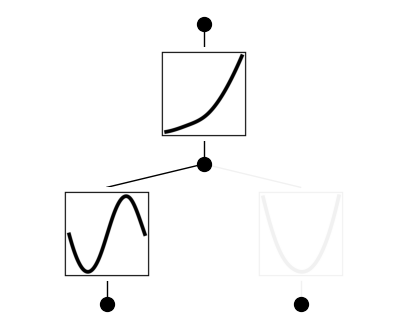

In [60]:
model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model2 = model2.prune()
model2(dataset['train_input'])
model2.plot()

fixing (0,0,0) with sin, r2=0.9997373819351196
fixing (0,1,0) with cosh, r2=0.9997295141220093
fixing (1,0,0) with tanh, r2=0.9992735981941223


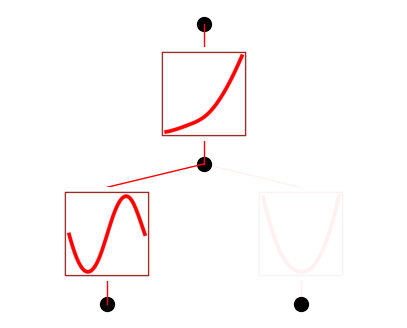

In [61]:
model2.auto_symbolic()
model2.plot()

In [62]:
model2.symbolic_formula()[0][0]

9.89*tanh(0.62*sin(3.13*x_1) + 0.49*cosh(1.47*x_2) - 2.06) + 10.05

In [64]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model2.auto_symbolic(lib=lib)

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (1,0,0) since already symbolic


In [66]:
model2.unfix_symbolic_all()

train loss: 5.52e-02 | test loss: 5.53e-02 | reg: 6.86e+00 : 100%|██| 20/20 [00:05<00:00,  3.99it/s]


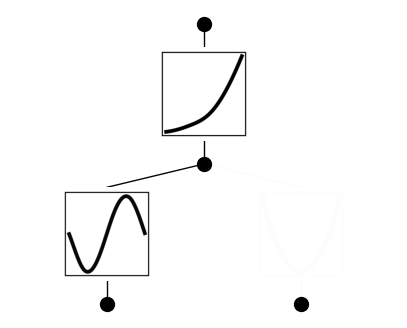

In [67]:
model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model2 = model2.prune()
model2(dataset['train_input'])
model2.plot()

train loss: 5.92e-02 | test loss: 5.82e-02 | reg: 1.13e+01 : 100%|██| 20/20 [00:04<00:00,  4.64it/s]


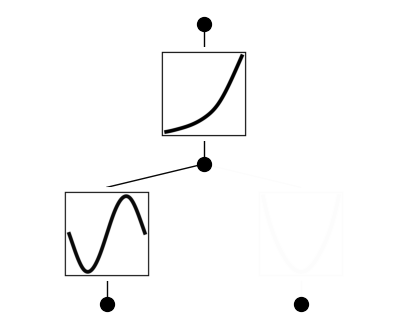

In [68]:
model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model2 = model2.prune()
model2(dataset['train_input'])
model2.plot()

fixing (0,0,0) with sin, r2=0.9998868107795715
fixing (0,1,0) with cosh, r2=0.9994134902954102
fixing (1,0,0) with x^4, r2=0.9984518885612488


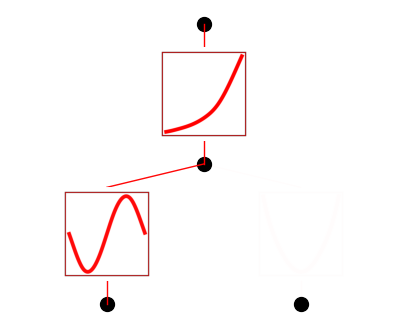

In [69]:
model2.auto_symbolic()
model2.plot()

train loss: 5.77e-02 | test loss: 5.63e-02 | reg: 1.17e+01 : 100%|██| 20/20 [00:02<00:00,  8.17it/s]


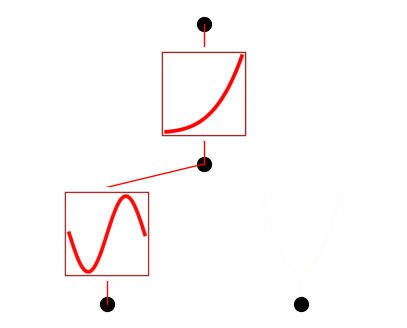

In [70]:
model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model2 = model2.prune()
model2(dataset['train_input'])
model2.plot()

In [71]:
model2.symbolic_formula()[0][0]

0.34*(-0.48*sin(3.16*x_1) - cosh(0.96*x_2) - 0.12)**4 + 0.45

In [72]:
model2.unfix_symbolic_all()

train loss: 6.12e-02 | test loss: 6.11e-02 | reg: 1.22e+01 : 100%|██| 20/20 [00:05<00:00,  3.84it/s]


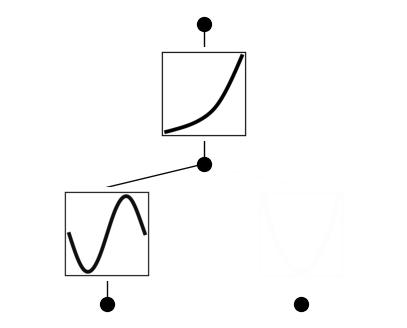

In [73]:
model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model2 = model2.prune()
model2(dataset['train_input'])
model2.plot()

In [74]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model2.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999647736549377
fixing (0,1,0) with x^2, r2=0.9993504881858826
fixing (1,0,0) with x^4, r2=0.9980787038803101


In [75]:
model2.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model2 = model2.prune()
model2(dataset['train_input'])
model2.plot()

train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 20/20 [00:04<00:00,  4.38it/s]


RuntimeError: stack expects a non-empty TensorList

/Users/jeqcho/miniconda3/envs/kanenv/lib/python3.12/site-packages/kan/KAN.py:683: RuntimeWarning: divide by zero encountered in scalar divide
  spacing = A / n


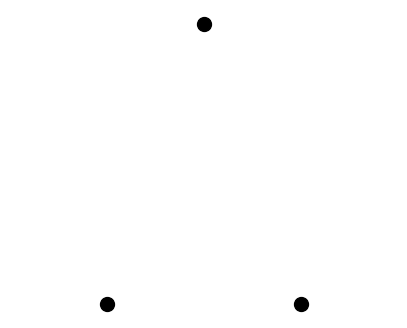

In [79]:
model2.plot()

In [86]:
model3 = KAN(width=[2,5,1], grid=5, k=3, seed=0)

In [87]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 7.70e-02 | test loss: 8.24e-02 | reg: 1.67e+01 : 100%|██| 20/20 [00:04<00:00,  4.16it/s]


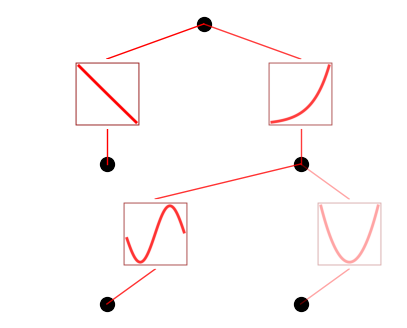

In [88]:
model.plot()

train loss: 1.40e-01 | test loss: 1.46e-01 | reg: 2.64e+01 : 100%|██| 20/20 [00:14<00:00,  1.37it/s]


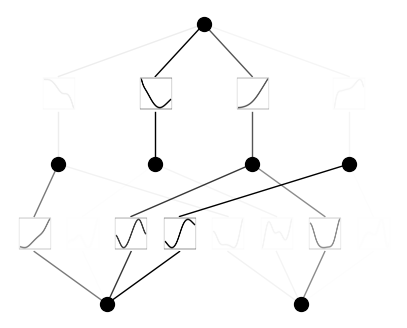

In [89]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model3 = model3.prune()
model3(dataset['train_input'])
model3.plot()

train loss: 9.43e-02 | test loss: 9.89e-02 | reg: 1.74e+01 : 100%|██| 20/20 [00:06<00:00,  2.93it/s]


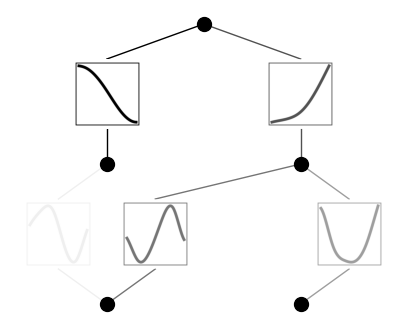

In [90]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model3 = model3.prune()
model3(dataset['train_input'])
model3.plot()

train loss: 7.49e-02 | test loss: 7.92e-02 | reg: 1.68e+01 : 100%|██| 20/20 [00:08<00:00,  2.36it/s]


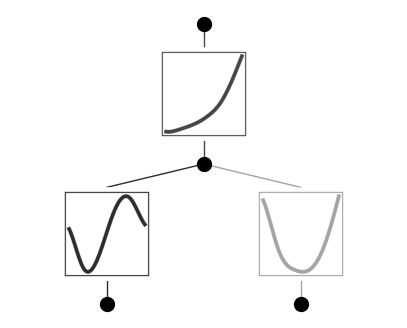

In [91]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model3 = model3.prune()
model3(dataset['train_input'])
model3.plot()

train loss: 5.72e-02 | test loss: 5.70e-02 | reg: 3.92e+00 : 100%|██| 20/20 [00:04<00:00,  4.53it/s]


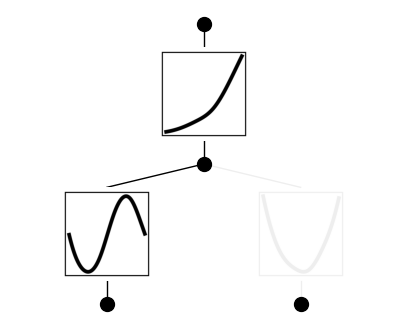

In [92]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model3 = model3.prune()
model3(dataset['train_input'])
model3.plot()

In [93]:
model3.auto_symbolic(lib=lib)
model3.unfix_symbolic_all()

fixing (0,0,0) with sin, r2=0.9991664886474609
fixing (0,1,0) with x^2, r2=0.9972355365753174
fixing (1,0,0) with tanh, r2=0.998630166053772


In [94]:
model3.auto_symbolic()
model3.unfix_symbolic_all()

fixing (0,0,0) with sin, r2=0.9991664886474609
fixing (0,1,0) with cosh, r2=0.9985065460205078
fixing (1,0,0) with arctan, r2=0.9995993971824646


In [95]:
model3.suggest_symbolic(0,1,0)

function , r2
cosh , 0.9985065460205078
x^2 , 0.9972355365753174
gaussian , 0.996606707572937
sin , 0.9939919710159302
x^4 , 0.9336618185043335


('cosh',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9985065460205078)

In [96]:
model3.suggest_symbolic(1,0,0)

function , r2
arctan , 0.9995993971824646
tanh , 0.998630166053772
sigmoid , 0.9986301064491272
gaussian , 0.9984385967254639
cosh , 0.9982474446296692


('arctan',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9995993971824646)

In [97]:
model3.suggest_symbolic(1,0,0,lib=lib)

function , r2
tanh , 0.998630166053772
exp , 0.9982473254203796
x^4 , 0.9979613423347473
x^3 , 0.9970070123672485
x^2 , 0.9904457330703735


('tanh',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.998630166053772)

In [98]:
model3.fix_symbolic(0,0,0,'sin')

r2 is 0.9991664886474609


tensor(0.9992)

train loss: 4.90e-02 | test loss: 4.94e-02 | reg: 8.43e+00 : 100%|██| 20/20 [00:04<00:00,  4.19it/s]


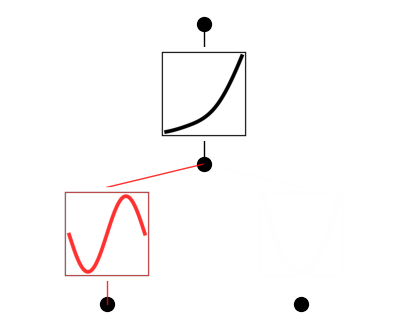

In [99]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model3(dataset['train_input'])
model3.plot()

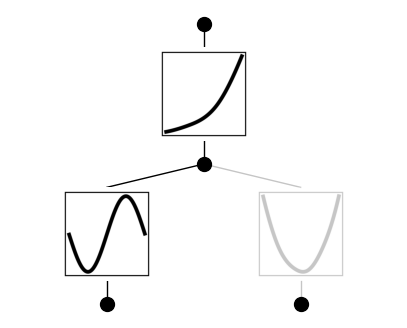

In [103]:
model3.plot(beta=100)

In [100]:
model3.auto_symbolic()
model3.unfix_symbolic_all()

skipping (0,0,0) since already symbolic
fixing (0,1,0) with cosh, r2=0.9992824196815491
fixing (1,0,0) with x^4, r2=0.9986571073532104


In [101]:
model3.auto_symbolic(lib=lib)
model3.unfix_symbolic_all()

fixing (0,0,0) with sin, r2=0.9999990463256836
fixing (0,1,0) with x^2, r2=0.9989323019981384
fixing (1,0,0) with x^4, r2=0.9986571073532104


In [104]:
model3.auto_symbolic()
model3.unfix_symbolic_all()

fixing (0,0,0) with sin, r2=0.9999990463256836
fixing (0,1,0) with cosh, r2=0.9992824196815491
fixing (1,0,0) with x^4, r2=0.9986571073532104


In [106]:
model3.fix_symbolic(0,0,0,"sin")
model3.fix_symbolic(0,1,0,"x^2")

r2 is 0.9999990463256836
Best value at boundary.
r2 is 0.9989323019981384


tensor(0.9989)

train loss: 9.02e-02 | test loss: 9.11e-02 | reg: 1.79e+01 : 100%|██| 20/20 [00:02<00:00,  8.76it/s]


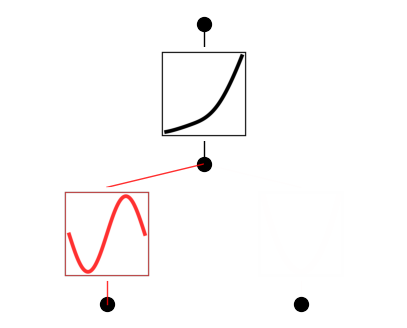

In [107]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model3(dataset['train_input'])
model3.plot()

In [113]:
model3.auto_symbolic()
model3.unfix_symbolic(1,0,0)

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
fixing (1,0,0) with 1/x^4, r2=0.997780442237854


In [114]:
model3.auto_symbolic(lib=lib)
model3.unfix_symbolic(1,0,0)

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
fixing (1,0,0) with x^4, r2=0.9976869821548462


In [115]:
model3.suggest_symbolic(1,0,0)

function , r2
1/x^4 , 0.997780442237854
x^4 , 0.9976869821548462
1/x^3 , 0.9974130392074585
x^3 , 0.9961302280426025
1/x^2 , 0.9947368502616882


('1/x^4',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.997780442237854)

In [116]:
model3.suggest_symbolic(1,0,0,lib=lib)

function , r2
x^4 , 0.9976869821548462
x^3 , 0.9961302280426025
x^2 , 0.9856294393539429
sin , 0.9855359792709351
log , 0.9840176701545715


('x^4',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9976869821548462)

train loss: 9.02e-02 | test loss: 9.11e-02 | reg: 1.79e+01 : 100%|██| 20/20 [00:01<00:00, 13.10it/s]


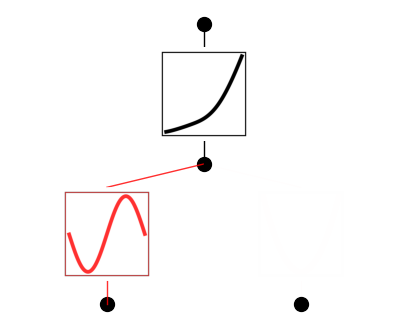

In [117]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model3(dataset['train_input'])
model3.plot()

In [119]:
model3.auto_symbolic()
model3.symbolic_formula()

([-0.24 + 1.3/(-0.18*x_2**2 - 0.18*sin(3.14*x_1 + 0.01) + 1)**4], [x_1, x_2])

In [120]:
model3.symbolic_formula()[0]

[-0.24 + 1.3/(-0.18*x_2**2 - 0.18*sin(3.14*x_1 + 0.01) + 1)**4]

In [121]:
model3.symbolic_formula()[0][0]

-0.24 + 1.3/(-0.18*x_2**2 - 0.18*sin(3.14*x_1 + 0.01) + 1)**4

In [122]:
model3.fix_symbolic(1,0,0,'exp')

Best value at boundary.
r2 is 0.8962758779525757
r2 is not very high, please double check if you are choosing the correct symbolic function.


tensor(0.8963, grad_fn=<SelectBackward0>)

train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 20/20 [00:04<00:00,  4.19it/s]


UnboundLocalError: cannot access local variable 'alpha_mask' where it is not associated with a value

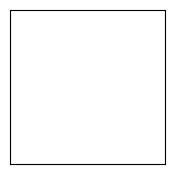

In [123]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model3(dataset['train_input'])
model3.plot()

In [132]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 20/20 [00:06<00:00,  3.00it/s]


{'train_loss': [array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32)],
 'test_loss': [array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dt

In [133]:
model3.unfix_symbolic(1,0,0)

In [134]:
model3.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 20/20 [00:05<00:00,  3.58it/s]


{'train_loss': [array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32)],
 'test_loss': [array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dt